In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


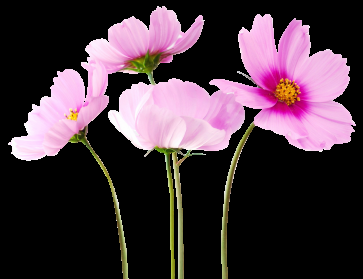

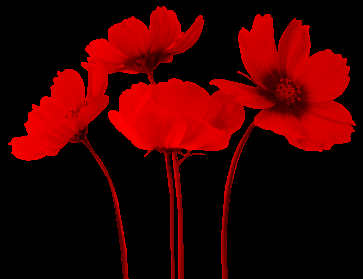

In [4]:
import cv2
import numpy as np

from skimage import io,color
from google.colab.patches import cv2_imshow # Import the correct function for displaying images in Colab

image=cv2.imread('/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png')

cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

def colorize_grayscale(image):
    # Load the grayscale image
    grayscale_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    # Create a blank color image with the same dimensions as the grayscale image
    color_image = np.zeros((grayscale_image.shape[0], grayscale_image.shape[1], 3), dtype=np.uint8)

    # Iterate over each pixel in the grayscale image
    for i in range(grayscale_image.shape[0]):
        for j in range(grayscale_image.shape[1]):
            # Get the grayscale pixel value
            grayscale_pixel = grayscale_image[i, j]

            # Map the grayscale pixel value to a color value
            color_pixel = map_grayscale_to_color(grayscale_pixel)

            # Set the color pixel value in the color image
            color_image[i, j] = color_pixel

    return color_image

def map_grayscale_to_color(grayscale_pixel):
    # Define a simple color mapping function
    # You can customize this function to create different color effects
    # Here, we map the grayscale pixel value to a blue color tone
    color_pixel = [0, 0, grayscale_pixel]

    return color_pixel

# Colorize a grayscale image
colorized_image = colorize_grayscale("/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png")

# Display the colorized image using cv2_imshow
cv2_imshow(colorized_image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

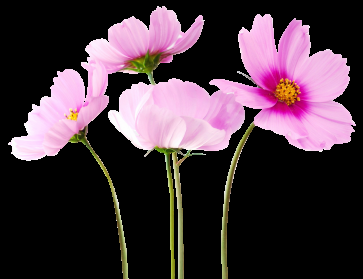

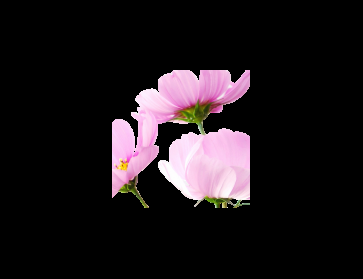

In [5]:

from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def translate(image, tx, ty):
    rows, cols = image.shape[:2]
    # Create translation matrix
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    # Apply translation
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    return translated_image

# Load the image
image = cv2.imread('/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png')

# Get dimensions
rows, cols = image.shape[:2]

# Define size and position of the center square
center_size = min(rows, cols) // 2
center_x = cols // 2
center_y = rows // 2

# Create mask for the center square
center_mask = np.zeros_like(image, dtype=np.uint8)
center_mask[center_y - center_size // 2:center_y + center_size // 2, center_x - center_size // 2:center_x + center_size // 2] = 255

# Apply translation to the center square
translated_center = translate(center_mask, tx=50, ty=50)

# Combine translated center with the outer region
result_with_center = cv2.bitwise_or(translated_center, cv2.bitwise_not(center_mask))

# Apply translation to the entire image
translated_image = translate(image, tx=50, ty=50)

# Combine translated image with the center square removed
result_without_center = cv2.bitwise_and(translated_image, center_mask)

# Display the results
cv2_imshow(image)
cv2_imshow(result_without_center)


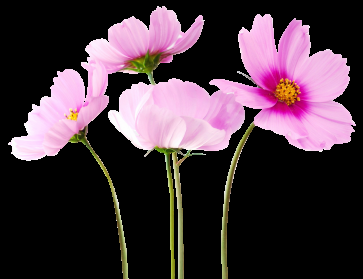

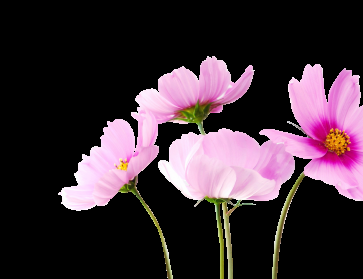

In [6]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def translate(image, tx, ty):
    rows, cols = image.shape[:2]
    # Create translation matrix
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    # Apply translation
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    return translated_image

# Load the image
image = cv2.imread('/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png')

# Get dimensions
rows, cols = image.shape[:2]

# Define the corner to shift to (e.g., top-left)
corner_x = 50
corner_y = 50

# Apply translation to the entire image
translated_image = translate(image, tx=corner_x, ty=corner_y)

# Display the original image
cv2_imshow(image)

# Display the shifted image
cv2_imshow(translated_image)


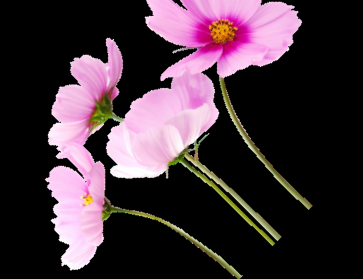

In [7]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

# Load the image
image = cv2.imread('/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png')

# Get dimensions
rows, cols = image.shape[:2]

# Define the angle of rotation
angle = 45

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)

# Apply rotation to the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Display the rotated image
cv2_imshow(rotated_image)

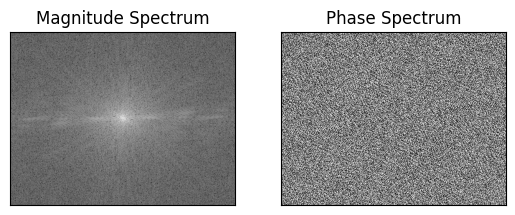

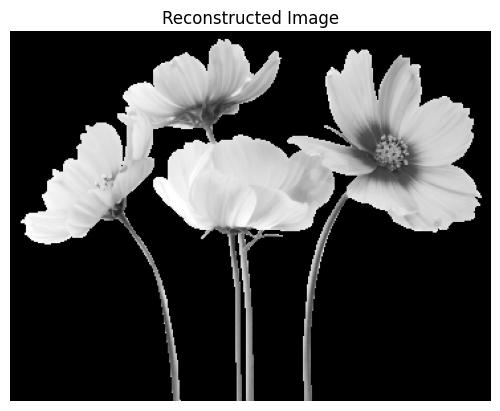

In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png', cv2.IMREAD_GRAYSCALE)

# Compute FFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
phase_spectrum = np.angle(fshift)

# Visualize Magnitude Spectrum
plt.subplot(121), plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

# Visualize Phase Spectrum
plt.subplot(122), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

# Resize Magnitude Spectrum to match Phase Spectrum dimensions
scaled_magnitude = cv2.resize(magnitude_spectrum, (phase_spectrum.shape[1], phase_spectrum.shape[0]), interpolation=cv2.INTER_LINEAR)
scaled_magnitude = scaled_magnitude / np.max(scaled_magnitude)  # Normalize the magnitude spectrum

# Reconstruct Image from Modified Magnitude and Original Phase Spectrum
scaled_fshift = np.fft.ifftshift(scaled_magnitude * np.exp(1j * phase_spectrum))
reconstructed_image = np.fft.ifft2(scaled_fshift)
reconstructed_image = np.abs(reconstructed_image)

# Display the reconstructed image
plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

reflection

Enter 0 if you want it to reflect it on x axis and 1 for y axis 1


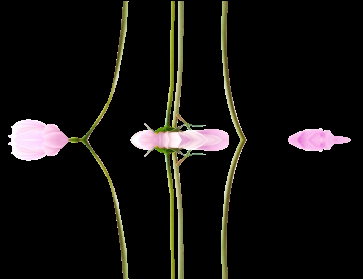

In [10]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png")

height, width, channel = image.shape

key = int(input("Enter 0 if you want it to reflect it on x axis and 1 for y axis "))

for i in range(height):
    for j in range(width):
        if(key==1):
            x = -i
            y = j
            image[i,j] = image[x,y]
        elif(key==0):
            y = -j
            x = i
            image[i,j] = image[x,y]


cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

shearing

Enter the shearing factor for the x-axis: 0.25


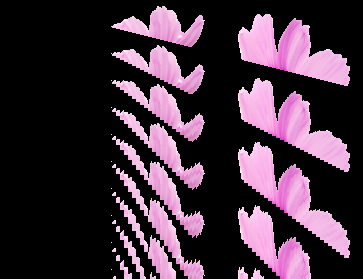

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the correct function to display images in Colab


image = cv2.imread("/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png")

height, width, channels = image.shape


dx = float(input("Enter the shearing factor for the x-axis: "))


sheared_image = np.zeros_like(image)

for i in range(height):
    for j in range(width):
        x = i + dx * j
        y = j
        x = max(0, min(int(x), height - 1))
        y = max(0, min(int(y), width - 1))
        image[int(x), int(y)] = image[i, j]


cv2_imshow(image) # Pass only the image to cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

rotation

Enter the angle in degrees that you want your image to rotate: 30


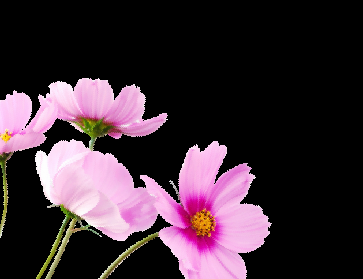

In [15]:
import cv2
import math
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

# Read the image
image = cv2.imread("/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png")

# Get image dimensions
height, width, channels = image.shape

# Convert angle from degrees to radians
theta = float(input("Enter the angle in degrees that you want your image to rotate: "))
theta_rad = math.radians(theta)

# Create a blank image to store the rotated image
rotated_image = image.copy()

# Calculate the center point for rotation
center_x = width / 2
center_y = height / 2

# Perform rotation pixel by pixel
for i in range(height):
    for j in range(width):
        # Translate to origin
        #x = i - center_y
        #y = j - center_x

        # Rotate
        x_new = i * math.cos(theta_rad) - j * math.sin(theta_rad)
        y_new = i * math.sin(theta_rad) + j * math.cos(theta_rad)


        # Round the coordinates to integers
        x_new = int(round(x_new))
        y_new = int(round(y_new))

        # Check if the new coordinates are within bounds
        if 0 <= x_new < height and 0 <= y_new < width:
            rotated_image[i, j] = image[x_new, y_new]
        else:
            rotated_image[i, j] = 0  # Set to black for out-of-bounds pixels

# Display the rotated image
cv2_imshow(rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


matrix

In [16]:
from PIL import Image

def image_to_matrix(image_path):
    img = Image.open(image_path)
    img = img.convert("L")  # Convert to grayscale
    matrix = list(img.getdata())
    width, height = img.size
    matrix = [matrix[i * width:(i + 1) * width] for i in range(height)]
    return matrix

# Example usage:
image_path = "/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png"  # Replace with the path to your image
matrix = image_to_matrix(image_path)
for row in matrix:
    print(row)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
translation

Enter the number of units you want to shift your x coordinate 2
Enter the number of units you want to shift your x coordinate 2
The new centre of the image lies at 141.5, 183.5


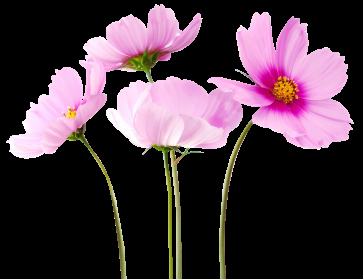

In [18]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab

# Read the image
image = cv2.imread("/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png")

height, width, channels = image.shape

dx = int(input("Enter the number of units you want to shift your x coordinate "))
dy = int(input("Enter the number of units you want to shift your x coordinate "))




for i in range(height):
    for j in range(width):
        x = i + dx
        y = j + dy
        x = max(0, min(x, height - 1))
        y = max(0, min(y, width-1))
        image[i,j] = image [ x,y]
# Display the image

height, width, channels = image.shape

x_centre = height/2
y_centre = width/2

# Calculate new center coordinates after shifting
new_x_centre = x_centre + dx
new_y_centre = y_centre + dy

print(f"The new centre of the image lies at {new_x_centre}, {new_y_centre}")



 #print(f"The centre of the image lies at {x_centre},{y_centre}")

# Use cv2_imshow instead of cv2.imshow
cv2_imshow(image) # Use cv2_imshow for Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

noise

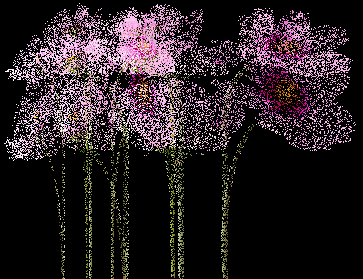

In [21]:
import cv2
import random
from google.colab.patches import cv2_imshow # Import cv2_imshow for Colab


image = cv2.imread("/content/drive/MyDrive/Flowers-PNG-Free-Download-363x279.png")

height, width, channel = image.shape

for i in range(height):
    for j in range(width):
        x = i * random.randint(1,2)
        y = j * random.randint(1,2)
        x = max(0,min(x,height-1))
        y = max(0,min(y,width-1))
        image[i, j] = image[x, y]

cv2_imshow(image) # Pass only the image to cv2_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()